# Iris EDA and Modeling

This notebook explores the Iris dataset and trains a few simple classifiers.

- Load the dataset
- Visualize distributions and relationships
- Split into train/test
- Train Logistic Regression, KNN, Decision Tree
- Evaluate with accuracy and confusion matrices


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

df = iris.frame.copy()
df.rename(columns={"target": "species"}, inplace=True)
df["species_name"] = df["species"].map(dict(enumerate(iris.target_names)))

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


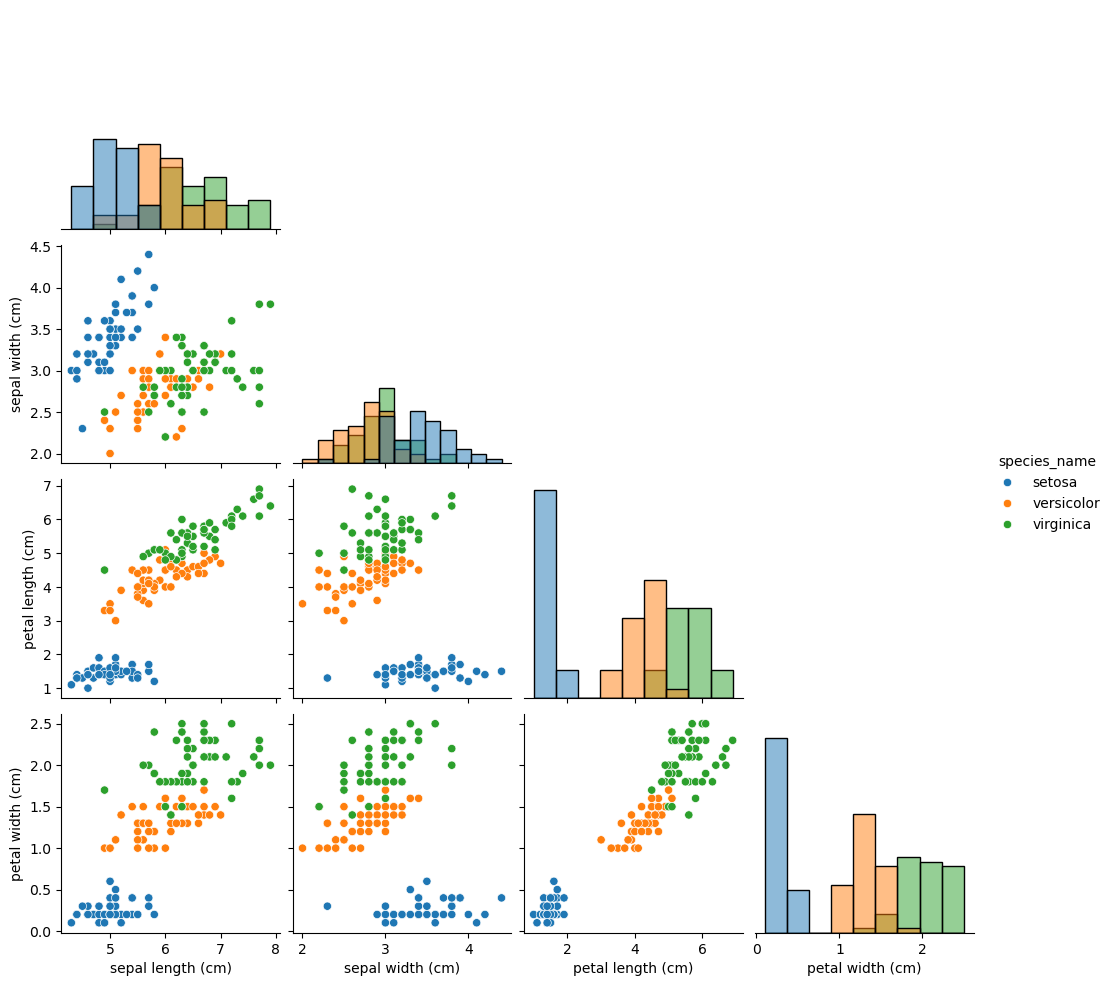

In [2]:
sns.pairplot(df, vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"], hue="species_name", corner=True, diag_kind="hist")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

feature_columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
X = df[feature_columns]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape


((120, 4), (30, 4))

Model: log_reg, accuracy=0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



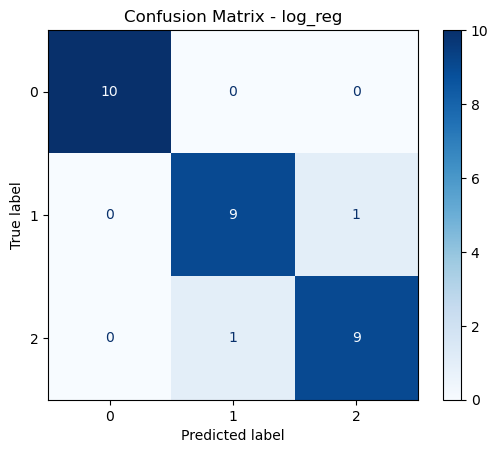

Model: knn, accuracy=0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



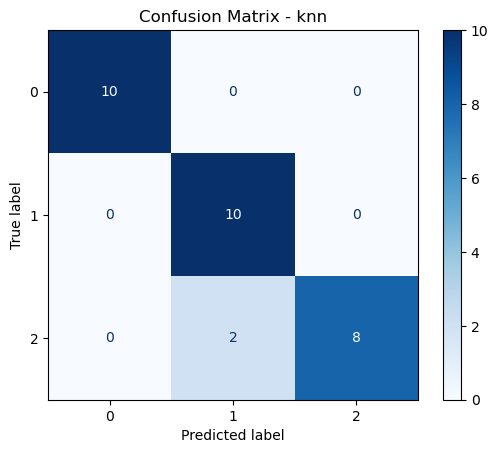

Model: decision_tree, accuracy=0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



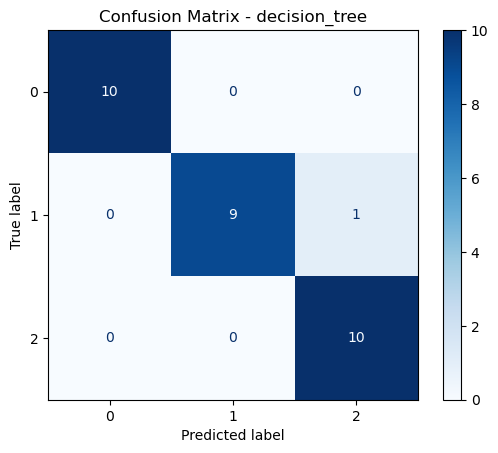

{'log_reg': 0.9333333333333333,
 'knn': 0.9333333333333333,
 'decision_tree': 0.9666666666666667}

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

numeric_features = [0, 1, 2, 3]
preprocess = ColumnTransformer(
    transformers=[("scale", StandardScaler(), numeric_features)],
    remainder="drop",
)

models = {
    "log_reg": Pipeline([("preprocess", preprocess), ("clf", LogisticRegression(max_iter=1000))]),
    "knn": Pipeline([("preprocess", preprocess), ("clf", KNeighborsClassifier(n_neighbors=5))]),
    "decision_tree": Pipeline([("preprocess", preprocess), ("clf", DecisionTreeClassifier(random_state=0))]),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Model: {name}, accuracy={acc:.4f}")
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

results
